In [1]:
import numpy as np
import pandas as pd
import functions.multi_occupation_network as multi_occupation_network
import functions.nominal_rigidity_network as nominal_rigidity_network
import matplotlib.pyplot as plt
from  functions.network_figures import bar_plot

# Calibration Excersize 3: Multiple Major Occupations

We now allow for a more flexible occupation-sector structure, using occupation-by-sector employment data from [NEED TO FILL IN].  

In [2]:
A_spec = 2
data_dir = '../data/clean/'
dfTau    = pd.read_csv(data_dir + 'tau_2021.csv').sort_values(by=['short_names'])
dfepsN   = pd.read_csv(data_dir + 'epsN_2021.csv', index_col=0).sort_index(axis=1)
dfcurlyL = pd.read_csv(data_dir + 'curlyL_2021.csv', index_col=0).sort_index()
dfA      = pd.read_csv(data_dir + f'A{A_spec}.csv')
sectors  = dfA['short_names']
dfDemand = pd.read_csv(data_dir + 'demand_tab.csv')
dfLshare = pd.read_csv(data_dir + 'labor_tab.csv')
dfLabor_market_yearly= pd.read_csv(data_dir + 'uvh_annual_updated.csv')
dfLabor_market_yearly = dfLabor_market_yearly.sort_values(by=['Year', 'short_names'])
dfLabor_market_yearly = dfLabor_market_yearly.dropna(axis=0)
dfLabor_market_yearly = dfLabor_market_yearly[dfLabor_market_yearly['Year'] == 2021]
dfMatching_params = pd.read_csv(data_dir + 'matching_param_estimates.csv')
shares = pd.read_csv(data_dir + 'energy_capital_shares.csv')
sector_names = list(dfA['short_names']) + ['Agg Y']
occupation_names = list(dfcurlyL.index)
dfcurlyL_weights = dfcurlyL.T.rename_axis('short_names').reset_index().melt(id_vars='short_names')

In [3]:
dfTau.head()

,Industry,TOT_EMP,TOT_EMP_HR,Workers,Tau,short_names
6,Leisure and hospitality,13558650.0,21710.0,13536940.0,0.001604,accom
0,Construction,7368800.0,18050.0,7350750.0,0.002456,const
1,Durable goods manufacturing,7511780.0,51040.0,7460740.0,0.006841,dur
2,Education and health services,33322000.0,163750.0,33158250.0,0.004938,edhealth
3,Financial activities,8198430.0,65380.0,8133050.0,0.008039,fin


In [4]:
dfOccuTau = pd.merge(dfTau, dfcurlyL_weights, on=['short_names']) 
dfOccuTau.loc[:, "OccuTau"] = dfOccuTau['value'] * dfOccuTau['Tau']
dfOccuTau = dfOccuTau.groupby('OCC_TITLE').aggregate({'OccuTau': 'sum'})
dfOccuTau.head()

,OccuTau
OCC_TITLE,
Admin,0.008722
Agg,0.007440
Arts,0.010845
Bus Ops,0.011701
Care,0.008919


In [5]:
dfMatching_params.head()

,short_names,matching_efficiency,unemployment_elasticity
0,accom,1.185008,0.401161
1,const,1.105935,0.506507
2,dur,0.687520,0.364421
3,edhealth,0.702722,0.336267
4,fin,0.705406,0.329389


In [6]:
dfOccuMatching_params = pd.merge(dfMatching_params, dfcurlyL_weights, on=['short_names'])
dfOccuMatching_params.loc[:, "OccuPhi"] = dfOccuMatching_params['value'] * dfOccuMatching_params['matching_efficiency']
dfOccuMatching_params.loc[:, "OccuEta"] = dfOccuMatching_params['value'] * dfOccuMatching_params['unemployment_elasticity']
dfOccuMatching_params = dfOccuMatching_params.groupby('OCC_TITLE').aggregate({'OccuPhi': 'sum', 'OccuEta': 'sum'})
dfOccuMatching_params.head()

,OccuPhi,OccuEta
OCC_TITLE,,
Admin,0.858199,0.370642
Agg,0.906382,0.390514
Arts,0.883824,0.354605
Bus Ops,0.868453,0.359017
Care,0.887053,0.384658


In [7]:
dfLabor_market_yearly 

,Industry,short_names,Year,Unemployment,Vacancy,Hires,Tightness
165,Leisure and hospitality,accom,2021,15667.0,17091.0,14350.0,1.090892
21,Construction,const,2021,7682.0,4174.0,4364.0,0.543348
45,Durable goods manufacturing,dur,2021,4642.0,5584.0,2965.0,1.202930
69,Education and health services,edhealth,2021,10310.0,21488.0,9383.0,2.084190
93,Financial activities,fin,2021,3476.0,5172.0,2746.0,1.487917
117,Government,gov,2021,6852.0,10919.0,4453.0,1.593549
141,Information,info,2021,1644.0,2137.0,1337.0,1.299878
189,"Mining, quarrying, and oil and gas extraction",mining,2021,889.0,324.0,229.0,0.364454
213,Nondurable goods manufacturing,nondur,2021,3063.0,4254.0,2399.0,1.388834
237,Other services,other,2021,4135.0,4696.0,2759.0,1.135671


In [8]:
dfOccu = pd.merge(dfLabor_market_yearly, dfcurlyL_weights, on=['short_names'])
dfOccu.loc[:, "OccuU"] = dfOccu['value'] * dfOccu['Unemployment']
dfOccu.loc[:, "OccuV"] = dfOccu['value'] * dfOccu['Vacancy']
dfOccu.loc[:, "OccuH"] = dfOccu['value'] * dfOccu['Hires']
dfOccu = dfOccu.groupby('OCC_TITLE').aggregate({'OccuU': 'sum', 'OccuV': 'sum', 'OccuH': 'sum'})
dfOccu.loc[:, 'OccuT'] = dfOccu['OccuV'] / dfOccu['OccuU']
dfOccu.head()

,OccuU,OccuV,OccuH,OccuT
OCC_TITLE,,,,
Admin,8724.235105,13959.436027,8321.879085,1.600076
Agg,10163.404085,13376.206364,9254.094634,1.316115
Arts,8604.407201,13692.824633,8771.608012,1.591373
Bus Ops,8013.018155,13520.194988,8333.427901,1.687279
Care,9558.839933,13992.161286,8423.508055,1.463793


In [9]:
# reformatting parameters
Omega = np.array(dfA.iloc[:, 1:], dtype='float64')
rescaler = np.matrix(1 - shares['Capital share'] - shares['Energy share'])
J = Omega.shape[0]
Omega = np.multiply(Omega, (np.repeat(rescaler, J).reshape(J, J)))
Psi = np.linalg.inv(np.eye(Omega.shape[0])-Omega)
curlyL = np.array(dfcurlyL)

O = dfcurlyL.shape[0]

epsN = np.array((np.array(dfLshare[f'labor_elasticity{A_spec}'], dtype='float64') * dfepsN.T).T)
epsN = np.multiply(epsN, rescaler.T)
epsD = np.array(dfDemand['demand_elasticity']).reshape((J,1))
epsK = np.matrix(shares[['Capital share', 'Energy share']])
K = epsK.shape[1]


#if you want to turn of network linkages turn on these two lines of code.
#Omega = np.zeros_like(Omega)
#Psi = np.eye(Omega.shape[0])
θ = dfOccu['OccuT']
ν = dfOccuMatching_params['OccuEta']

#r = 0.0293
tau = dfOccuTau['OccuTau']
curlyT = np.diag(tau)
curlyQ = np.diag(-ν)
curlyF =  np.eye(O) + curlyQ
#curlyT = np.diag(r / (np.mean(φ)*np.mean(θ)**(-ν) - r))
# NOTE: here I am picking the r so the τ's roughly look right. Down the line, we can calibrate τ directly from the data. 
# Also note that tightness is computed from unemployed workers, but in our model it should be computed from the whole work force.

First, we define the shocks we are interested in to allow us to easily change these in the future, that is we define the vectors $d\log\bm{A}$ and $d\log\bm{H}$.

## Calibration figures: Response to Energy Shock

### Aggregate importance of deviations from Hulten.

To analyse the quantitative importance of deviations from Hulten's theorem, below we vary $\gamma_A$ from 0 to 2, and plot the aggregate response to a 1\% shock to durable goods.

## Calibration figures: Response to Energy Shock

### Aggregate importance of deviations from Hulten.

To analyse the quantitative importance of deviations from Hulten's theorem, below we vary $\gamma_A$ from 0 to 2, and plot the aggregate response to a 1\% shock to durable goods.

In [10]:
dlog_A = np.zeros((J, 1))
dlog_H = np.zeros((O, 1))
dlog_K = np.zeros((K, 1))
dlog_K[1] = -0.01 
dlog_lam = np.zeros_like(dlog_A)
dlog_epsN = np.zeros_like(epsN)
dlog_epsD = np.zeros_like(epsD)
num = 3
curlyE = multi_occupation_network.curlyEFunc(dlog_epsN,epsN)
PriceAssumption = ['Hulten', '0.5MP', 'Rigid Real', 'Rigid Nominal', 'Dampening']
sectorY_vec = np.zeros((J+1,len(PriceAssumption)))
occT_vec = np.zeros((O, len(PriceAssumption)))
occU_vec = np.zeros((O, len(PriceAssumption)))
p_vec = np.zeros((J, len(PriceAssumption)))

In [11]:
epsWs = {'Hulten': multi_occupation_network.WageElasticityFunc(gamma_A=1, gamma_H=1, gamma_K=1, Psi=Psi, curlyL=curlyL, epsN=epsN, epsK=epsK),
        '0.5MP': multi_occupation_network.WageElasticityFuncMP(0.5,  Psi, epsN, epsK, curlyF, curlyQ, curlyT, curlyL),
        'Rigid Real': multi_occupation_network.WageElasticityFuncMP(0,  Psi, epsN, epsK, curlyF, curlyQ, curlyT, curlyL),
        'Dampening': multi_occupation_network.WageElasticityFunc(gamma_A=1.5, gamma_H=1.5, gamma_K=1.5, Psi=Psi, curlyL=curlyL, epsN=epsN, epsK=epsK)}
dlog_Ws = {}
for i in epsWs.keys():
    epsW_A, epsW_H, epsW_K = epsWs[i]
    dlog_Ws[i] = multi_occupation_network.WageFunc(dlog_A, dlog_H, dlog_K, epsW_A, epsW_H, epsW_K)
    

In [12]:
for i, a in enumerate(PriceAssumption):
    if a == 'Rigid Nominal':
        dlog_p = nominal_rigidity_network.PriceFuncAlt(dlog_A=dlog_A, dlog_H=dlog_H, dlog_K=dlog_K, Psi=Psi, epsN=epsN, epsK=epsK, curlyQ=curlyQ, curlyT=curlyT, curlyF=curlyF, curlyL=curlyL, num=num)
        dlog_theta = nominal_rigidity_network.ThetaFuncAlt(dlog_H, dlog_A, dlog_K, dlog_p, Psi, epsN, epsK, curlyL, curlyQ, curlyT, curlyF, num=num)
        dlog_y = multi_occupation_network.OutputFunc(dlog_A,dlog_H, dlog_K, dlog_theta, dlog_lam, Psi, Omega, curlyQ, curlyF, epsN, epsK, curlyT, curlyE)
        dlog_r = nominal_rigidity_network.rFunc(dlog_y, dlog_K, num)
    else:
        dlog_theta = multi_occupation_network.ThetaFunc(dlog_A, dlog_H, dlog_K, dlog_Ws[a], dlog_epsN, dlog_lam, Psi, Omega, curlyF, curlyQ, curlyT, curlyE, curlyL, epsN, epsK)
        dlog_y = multi_occupation_network.OutputFunc(dlog_A,dlog_H, dlog_K, dlog_theta, dlog_lam, Psi, Omega, curlyQ, curlyF, epsN, epsK, curlyT, curlyE)
        dlog_r = multi_occupation_network.rFunc(dlog_y, dlog_K, num)
        dlog_p = multi_occupation_network.PriceFunc(dlog_A, dlog_r, dlog_Ws[a], dlog_theta, Psi, curlyQ, epsN, epsK, curlyT, curlyL, num=num)
    sectorY_vec[:-1, i] = dlog_y.flatten()
    sectorY_vec[-1, i] = multi_occupation_network.AggOutputFunc(dlog_y, dlog_lam, dlog_epsD, epsD)
    p_vec[:, i] = dlog_p.flatten()
    occT_vec[:, i] = dlog_theta.flatten()
    occU_vec[:, i] = multi_occupation_network.UnemploymentFunc(multi_occupation_network.LaborSupply(dlog_H, dlog_theta, curlyF), dlog_H).flatten()

In [13]:
sectorY_vec.shape

(14, 5)

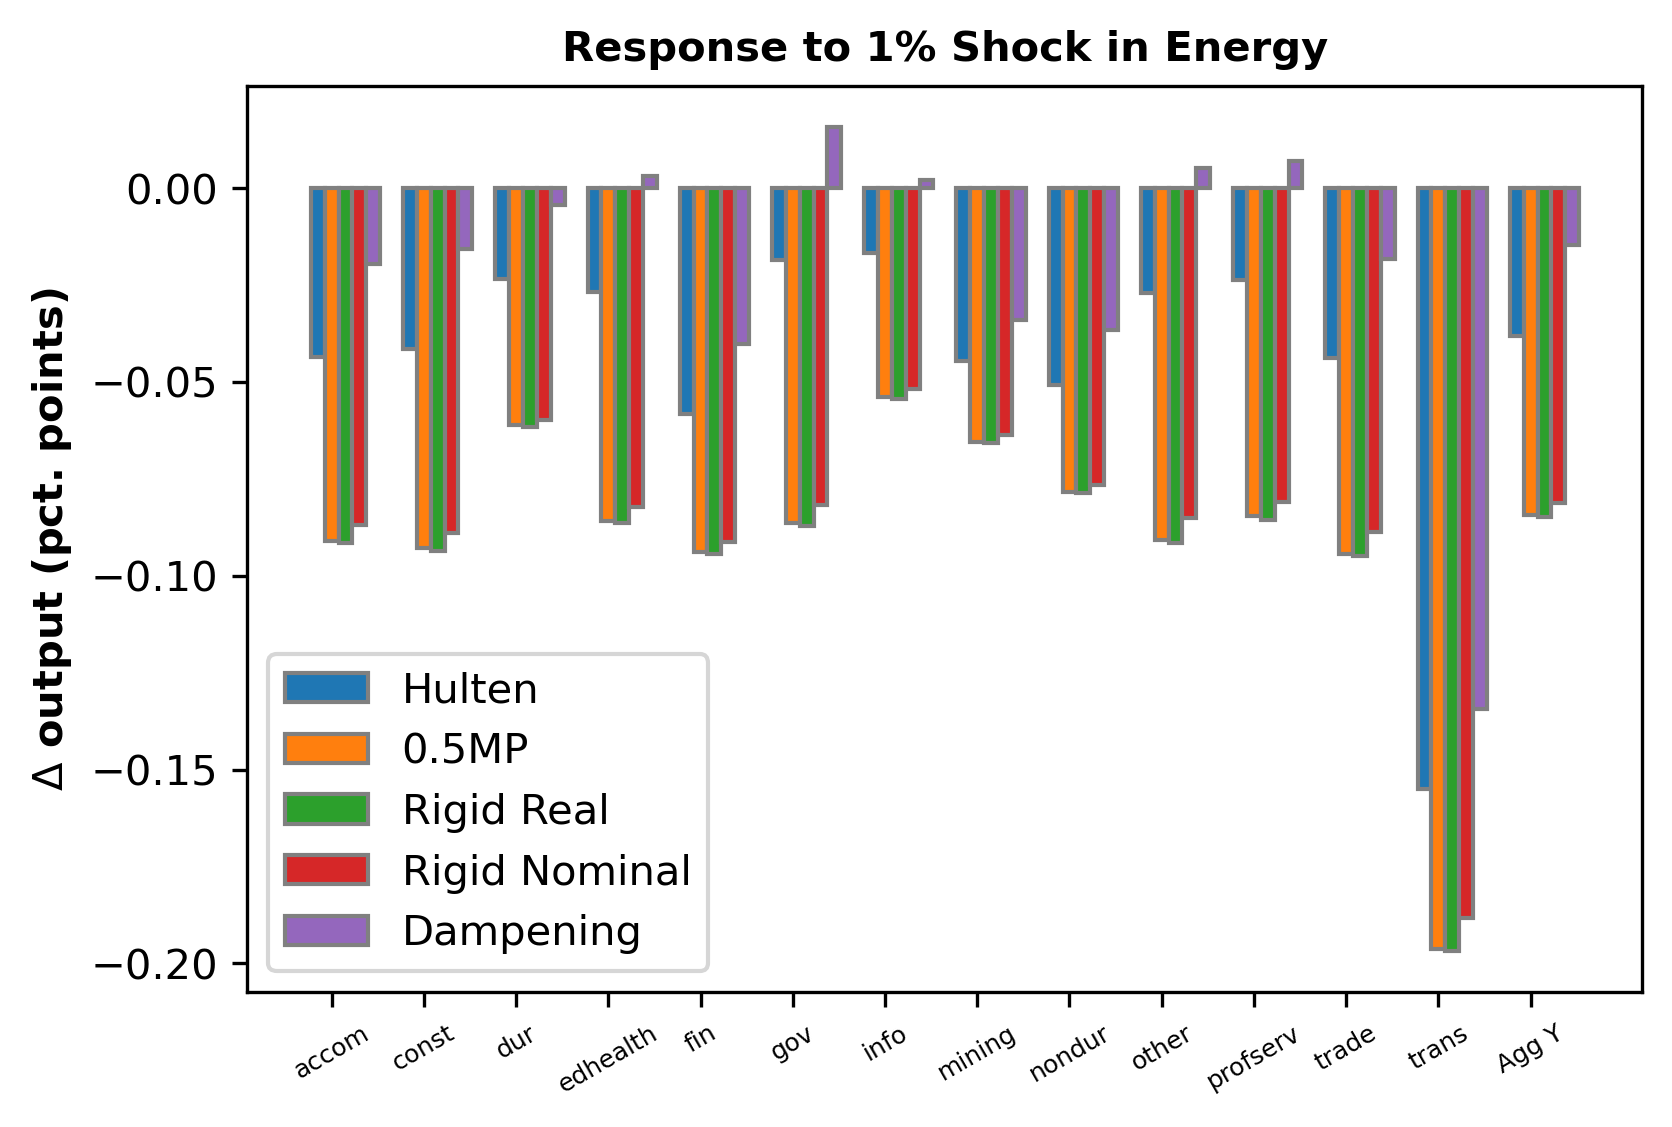

In [14]:
title = f'Response to 1% Shock in Energy'
xlab = ''
ylab = '$\Delta$ output (pct. points)'
save_path = f'../output/figures/energy_A{A_spec}_KshockY_calib3.png'
labels = PriceAssumption
bar_plot(100*sectorY_vec, sector_names, title, xlab, ylab, labels, save_path, rotation=30, fontsize=10, barWidth = 0.15, dpi=300)

In [15]:
occupation_names

['Admin',
 'Agg',
 'Arts',
 'Bus Ops',
 'Care',
 'Clean',
 'Cons',
 'Educ',
 'Eng',
 'Food S',
 'Health P',
 'Health S',
 'Legal',
 'Manag',
 'Math',
 'Prod',
 'Prot S',
 'Repair',
 'Sales',
 'Science',
 'Soc S',
 'Trans']

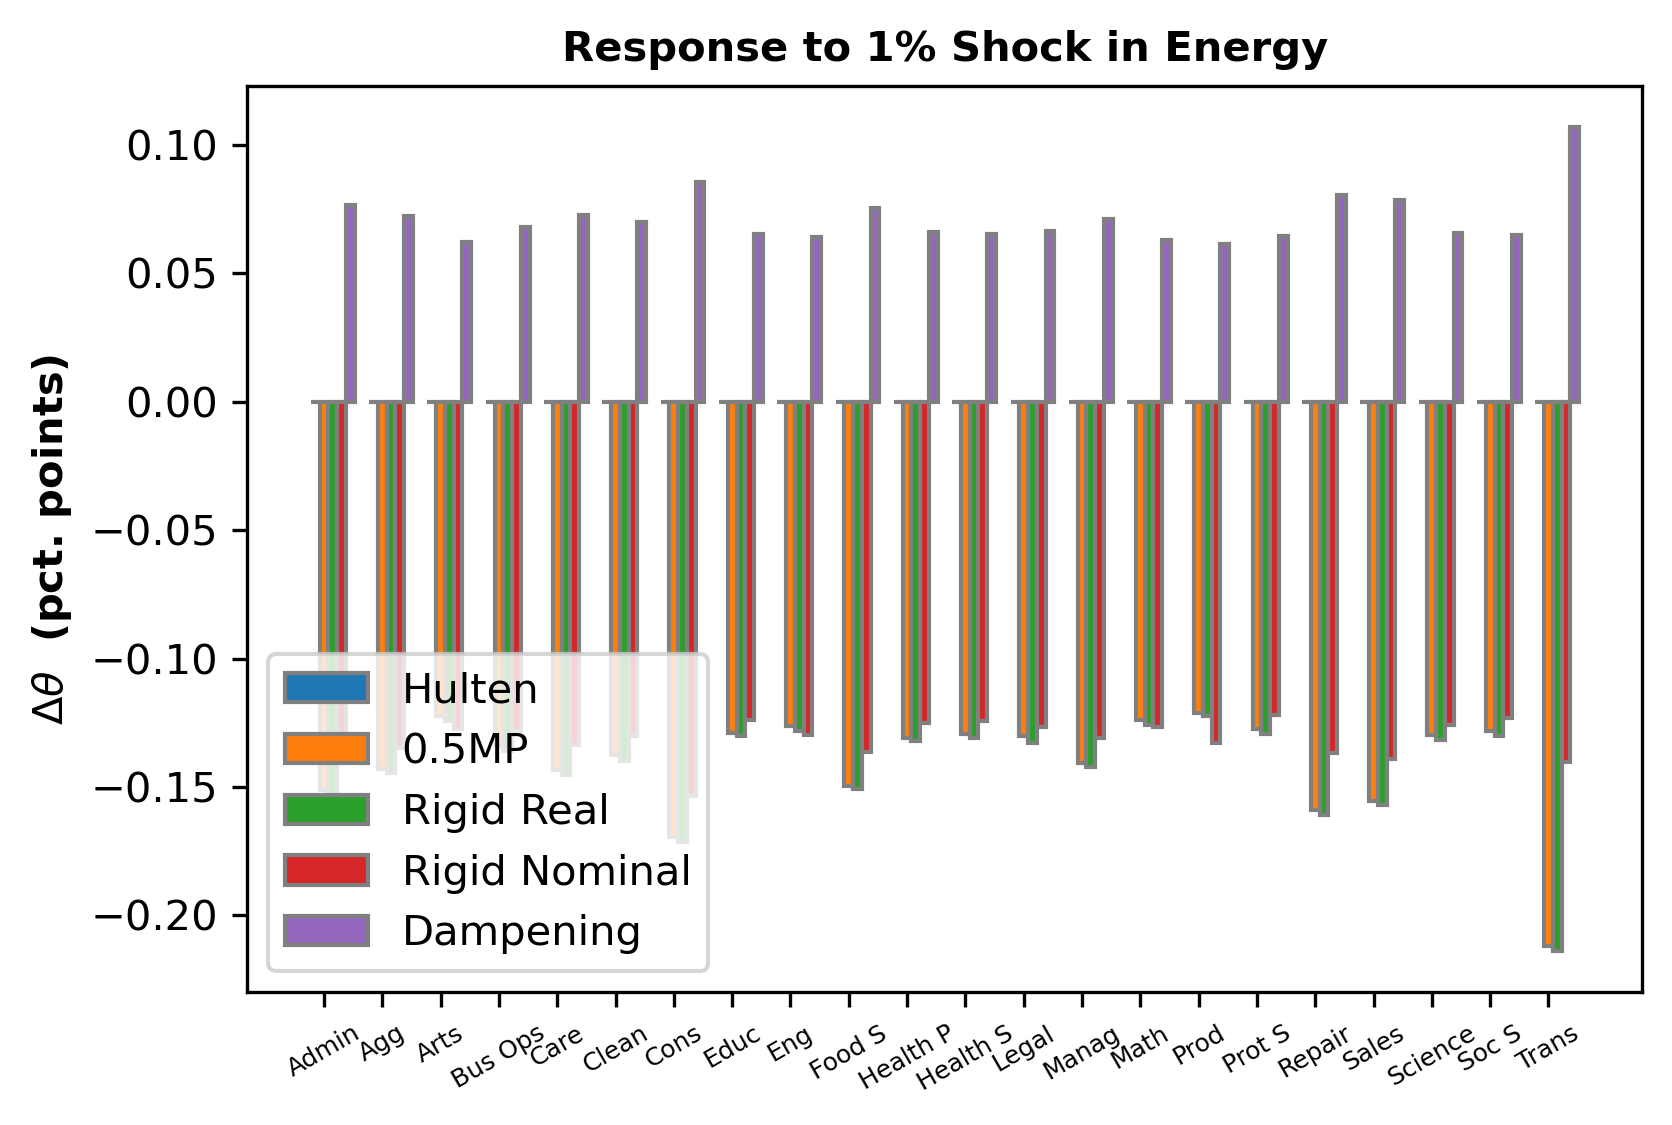

In [16]:
xlab = ''
ylab = '$\Delta \\theta$  (pct. points)'
save_path = f'../output/figures/energy_A{A_spec}_KshockT_calib3.png'
labels = PriceAssumption
bar_plot(100*occT_vec, occupation_names, title, xlab, ylab, labels, save_path, rotation=30, fontsize=10, barWidth = 0.15, dpi=300)

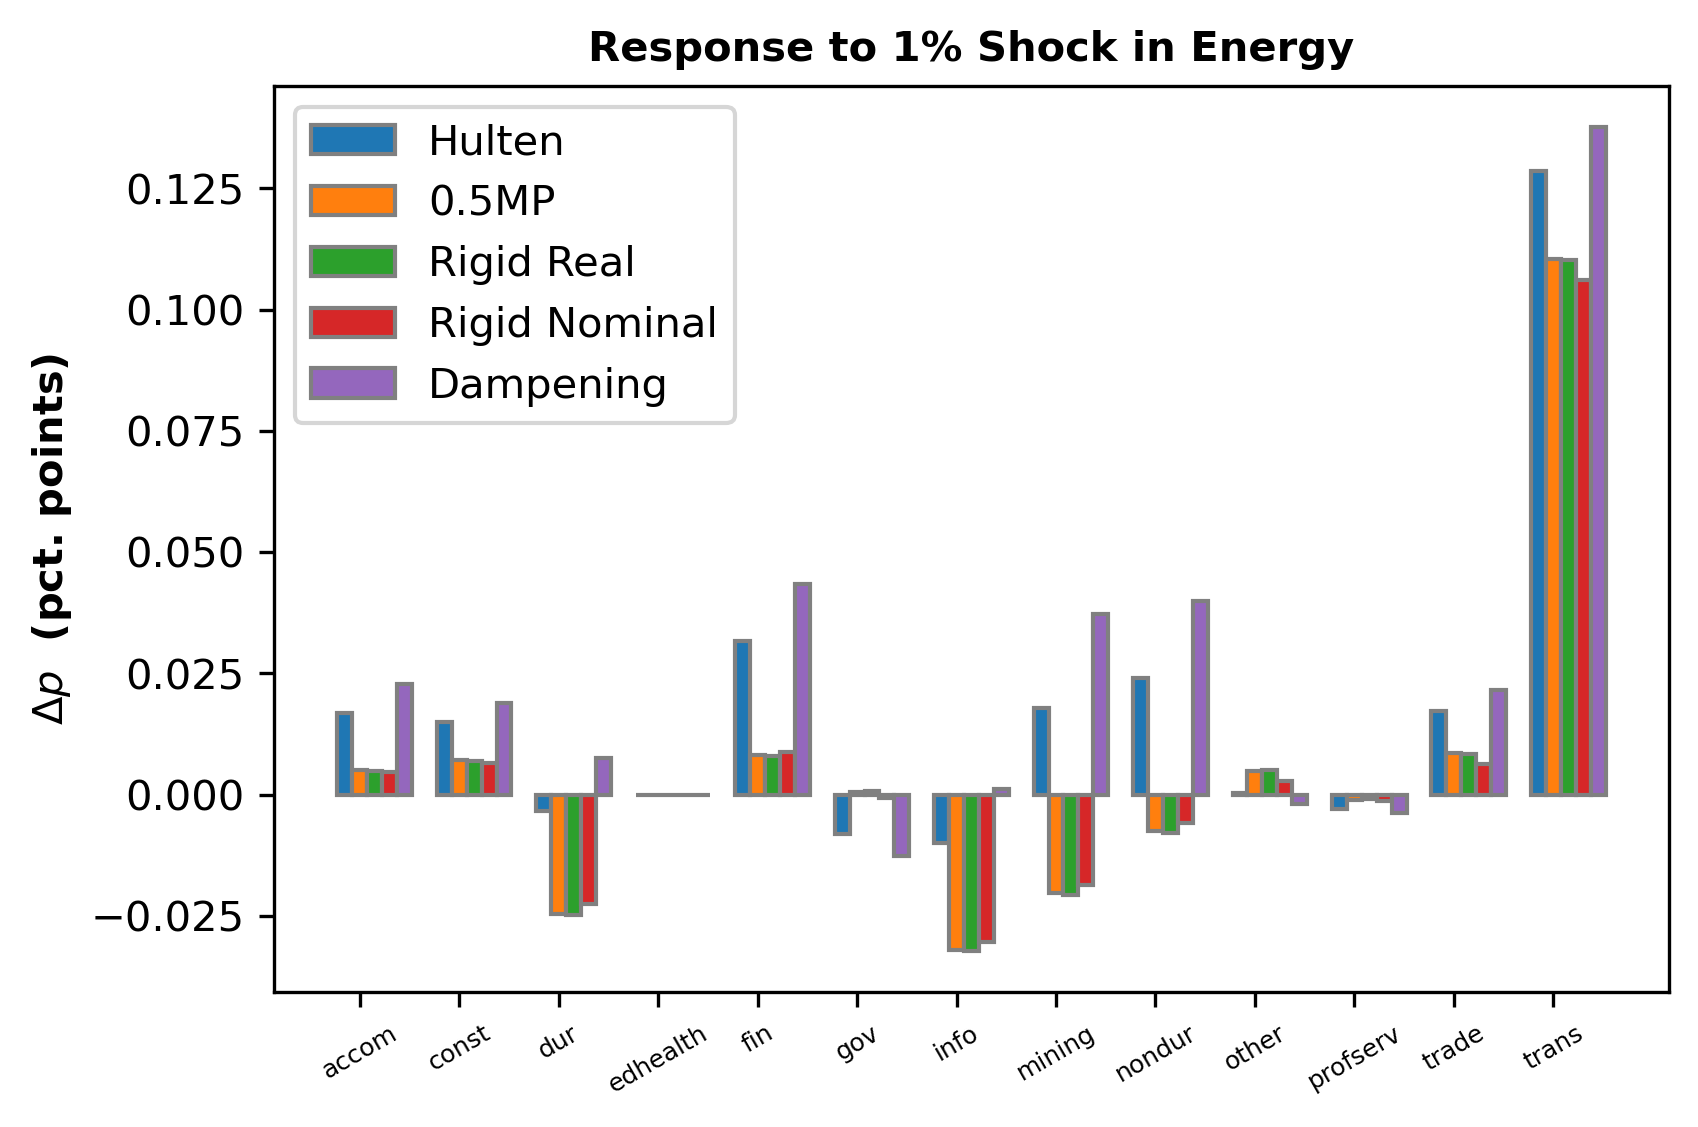

In [17]:
xlab = ''
ylab = '$\Delta p$  (pct. points)'
save_path = f'../output/figures/energy_A{A_spec}_KshockP_calib3.png'
labels = PriceAssumption
bar_plot(100*p_vec, sectors, title, xlab, ylab, labels, save_path, rotation=30, fontsize=10, barWidth = 0.15, dpi=300)

In [18]:
dlog_A = np.zeros((J, 1))
dlog_H = np.zeros((O, 1))
dlog_K = np.zeros((K, 1))
dlog_K[1] = -0.01 
dlog_lam = np.zeros_like(dlog_A)
dlog_epsN = np.zeros_like(epsN)
dlog_epsD = np.zeros_like(epsD)
num = 3
curlyE = multi_occupation_network.curlyEFunc(dlog_epsN,epsN)
PriceAssumption = ['Hulten', '0.5MP', 'Rigid Real', 'Rigid Nominal', 'Dampening']
sectorY_vec = np.zeros((J+1,len(PriceAssumption)))
occT_vec = np.zeros((O, len(PriceAssumption)))
occU_vec = np.zeros((O, len(PriceAssumption)))
p_vec = np.zeros((J, len(PriceAssumption)))

In [19]:
epsWs = {'Hulten': multi_occupation_network.WageElasticityFunc(gamma_A=1, gamma_H=1, gamma_K=1, Psi=Psi, curlyL=curlyL, epsN=epsN, epsK=epsK),
        '0.5MP': multi_occupation_network.WageElasticityFuncMP(0.5,  Psi, epsN, epsK, curlyF, curlyQ, curlyT, curlyL),
        'Rigid Real': multi_occupation_network.WageElasticityFuncMP(0,  Psi, epsN, epsK, curlyF, curlyQ, curlyT, curlyL),
        'Dampening': multi_occupation_network.WageElasticityFunc(gamma_A=1.5, gamma_H=1.5, gamma_K=1.5, Psi=Psi, curlyL=curlyL, epsN=epsN, epsK=epsK)}
dlog_Ws = {}
for i in epsWs.keys():
    epsW_A, epsW_H, epsW_K = epsWs[i]
    dlog_Ws[i] = multi_occupation_network.WageFunc(dlog_A, dlog_H, dlog_K, epsW_A, epsW_H, epsW_K)
    

In [20]:
for i, a in enumerate(PriceAssumption):
    if a == 'Rigid Nominal':
        dlog_p = nominal_rigidity_network.PriceFuncAlt(dlog_A=dlog_A, dlog_H=dlog_H, dlog_K=dlog_K, Psi=Psi, epsN=epsN, epsK=epsK, curlyQ=curlyQ, curlyT=curlyT, curlyF=curlyF, curlyL=curlyL, num=num)
        dlog_theta = nominal_rigidity_network.ThetaFuncAlt(dlog_H, dlog_A, dlog_K, dlog_p, Psi, epsN, epsK, curlyL, curlyQ, curlyT, curlyF, num=num)
        dlog_y = multi_occupation_network.OutputFunc(dlog_A,dlog_H, dlog_K, dlog_theta, dlog_lam, Psi, Omega, curlyQ, curlyF, epsN, epsK, curlyT, curlyE)
        dlog_r = nominal_rigidity_network.rFunc(dlog_y, dlog_K, num)
    else:
        dlog_theta = multi_occupation_network.ThetaFunc(dlog_A, dlog_H, dlog_K, dlog_Ws[a], dlog_epsN, dlog_lam, Psi, Omega, curlyF, curlyQ, curlyT, curlyE, curlyL, epsN, epsK)
        dlog_y = multi_occupation_network.OutputFunc(dlog_A,dlog_H, dlog_K, dlog_theta, dlog_lam, Psi, Omega, curlyQ, curlyF, epsN, epsK, curlyT, curlyE)
        dlog_r = multi_occupation_network.rFunc(dlog_y, dlog_K, num)
        dlog_p = multi_occupation_network.PriceFunc(dlog_A, dlog_r, dlog_Ws[a], dlog_theta, Psi, curlyQ, epsN, epsK, curlyT, curlyL, num=num)
    sectorY_vec[:-1, i] = dlog_y.flatten()
    sectorY_vec[-1, i] = multi_occupation_network.AggOutputFunc(dlog_y, dlog_lam, dlog_epsD, epsD)
    p_vec[:, i] = dlog_p.flatten()
    occT_vec[:, i] = dlog_theta.flatten()
    occU_vec[:, i] = multi_occupation_network.UnemploymentFunc(multi_occupation_network.LaborSupply(dlog_H, dlog_theta, curlyF), dlog_H).flatten()

In [21]:
sectorY_vec.shape

(14, 5)

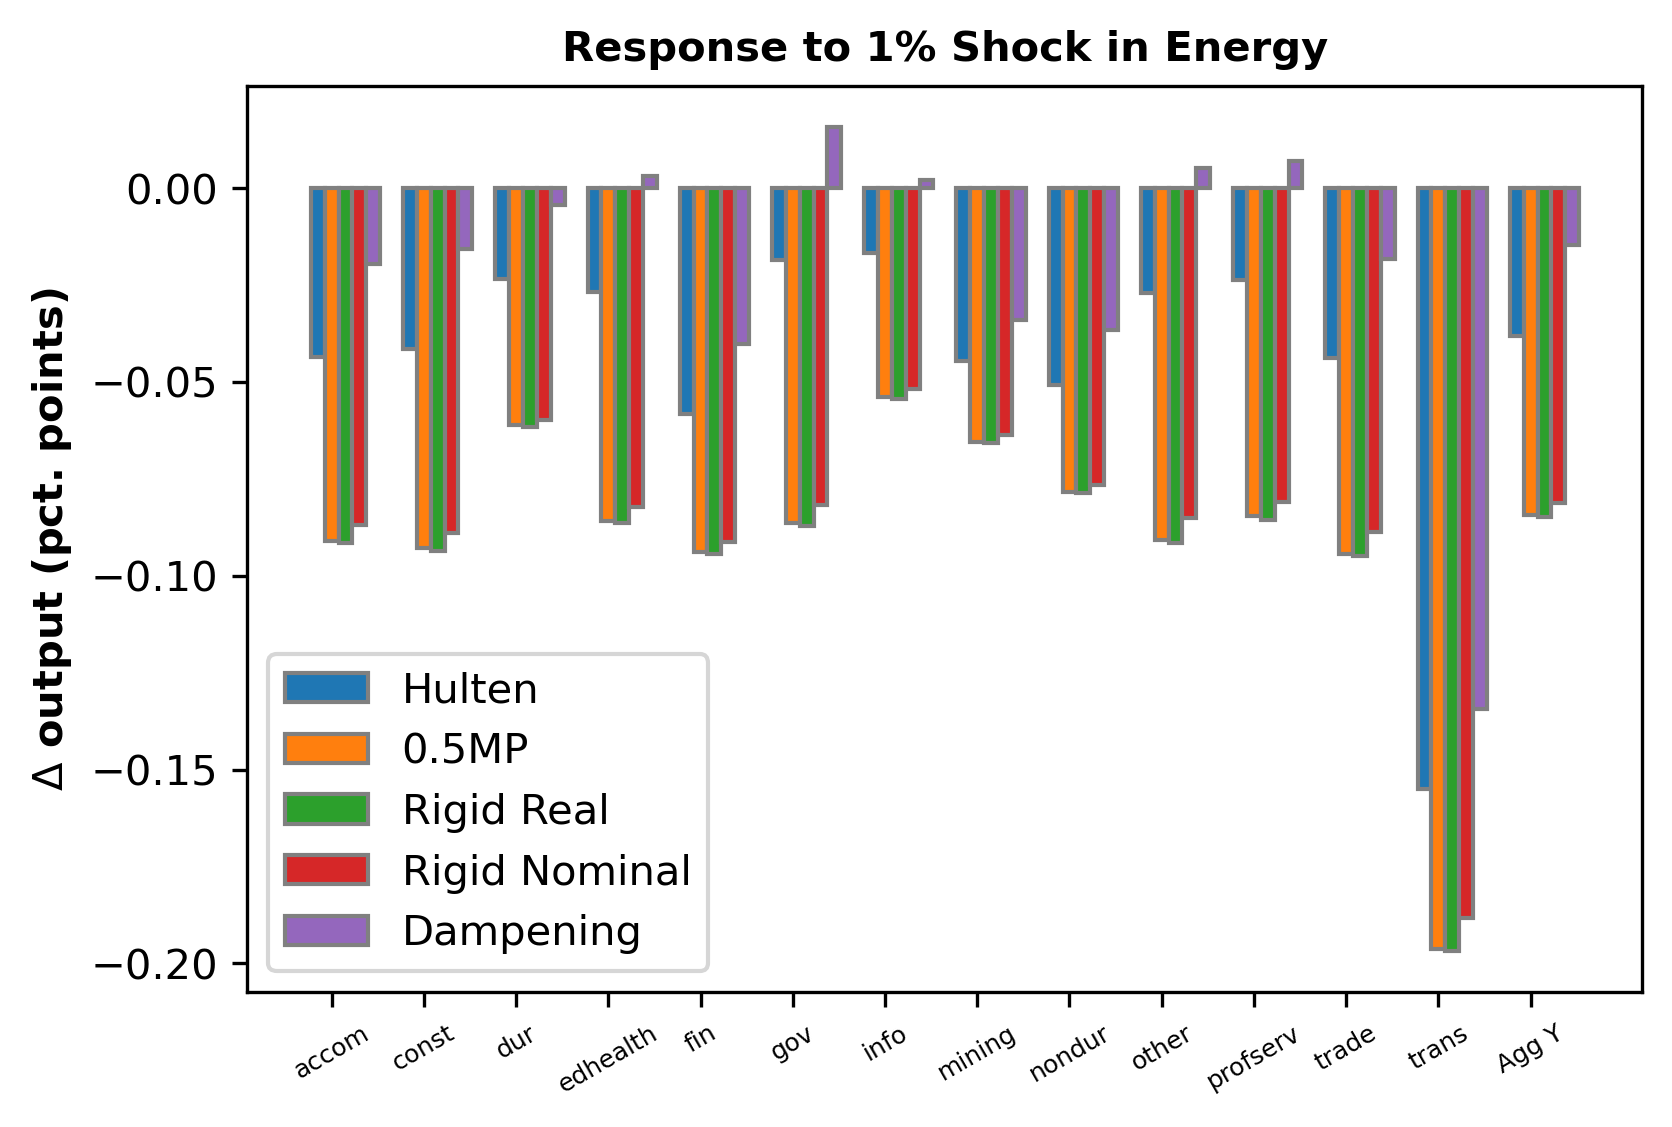

In [22]:
title = f'Response to 1% Shock in Energy'
xlab = ''
ylab = '$\Delta$ output (pct. points)'
save_path = f'../output/figures/energy_A{A_spec}_KshockY_calib3.png'
labels = PriceAssumption
bar_plot(100*sectorY_vec, sector_names, title, xlab, ylab, labels, save_path, rotation=30, fontsize=10, barWidth = 0.15, dpi=300)

In [23]:
occupation_names

['Admin',
 'Agg',
 'Arts',
 'Bus Ops',
 'Care',
 'Clean',
 'Cons',
 'Educ',
 'Eng',
 'Food S',
 'Health P',
 'Health S',
 'Legal',
 'Manag',
 'Math',
 'Prod',
 'Prot S',
 'Repair',
 'Sales',
 'Science',
 'Soc S',
 'Trans']

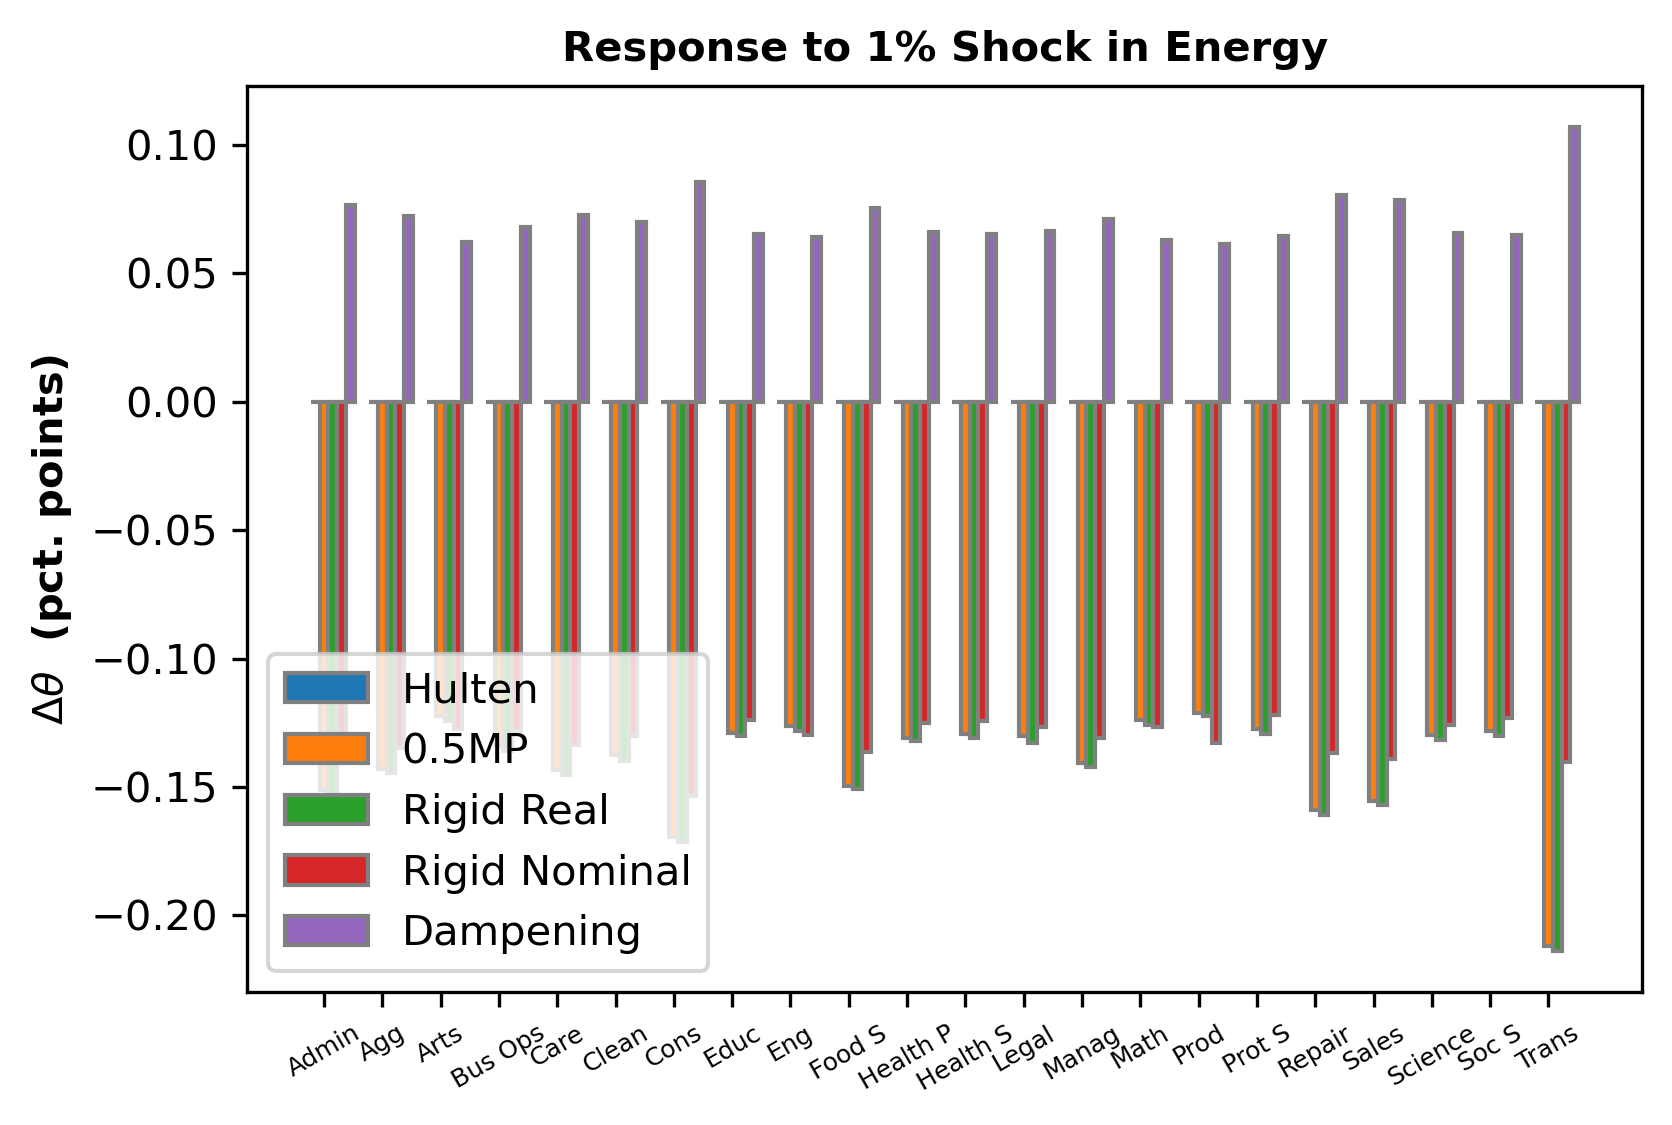

In [24]:
xlab = ''
ylab = '$\Delta \\theta$  (pct. points)'
save_path = f'../output/figures/energy_A{A_spec}_KshockT_calib3.png'
labels = PriceAssumption
bar_plot(100*occT_vec, occupation_names, title, xlab, ylab, labels, save_path, rotation=30, fontsize=10, barWidth = 0.15, dpi=300)

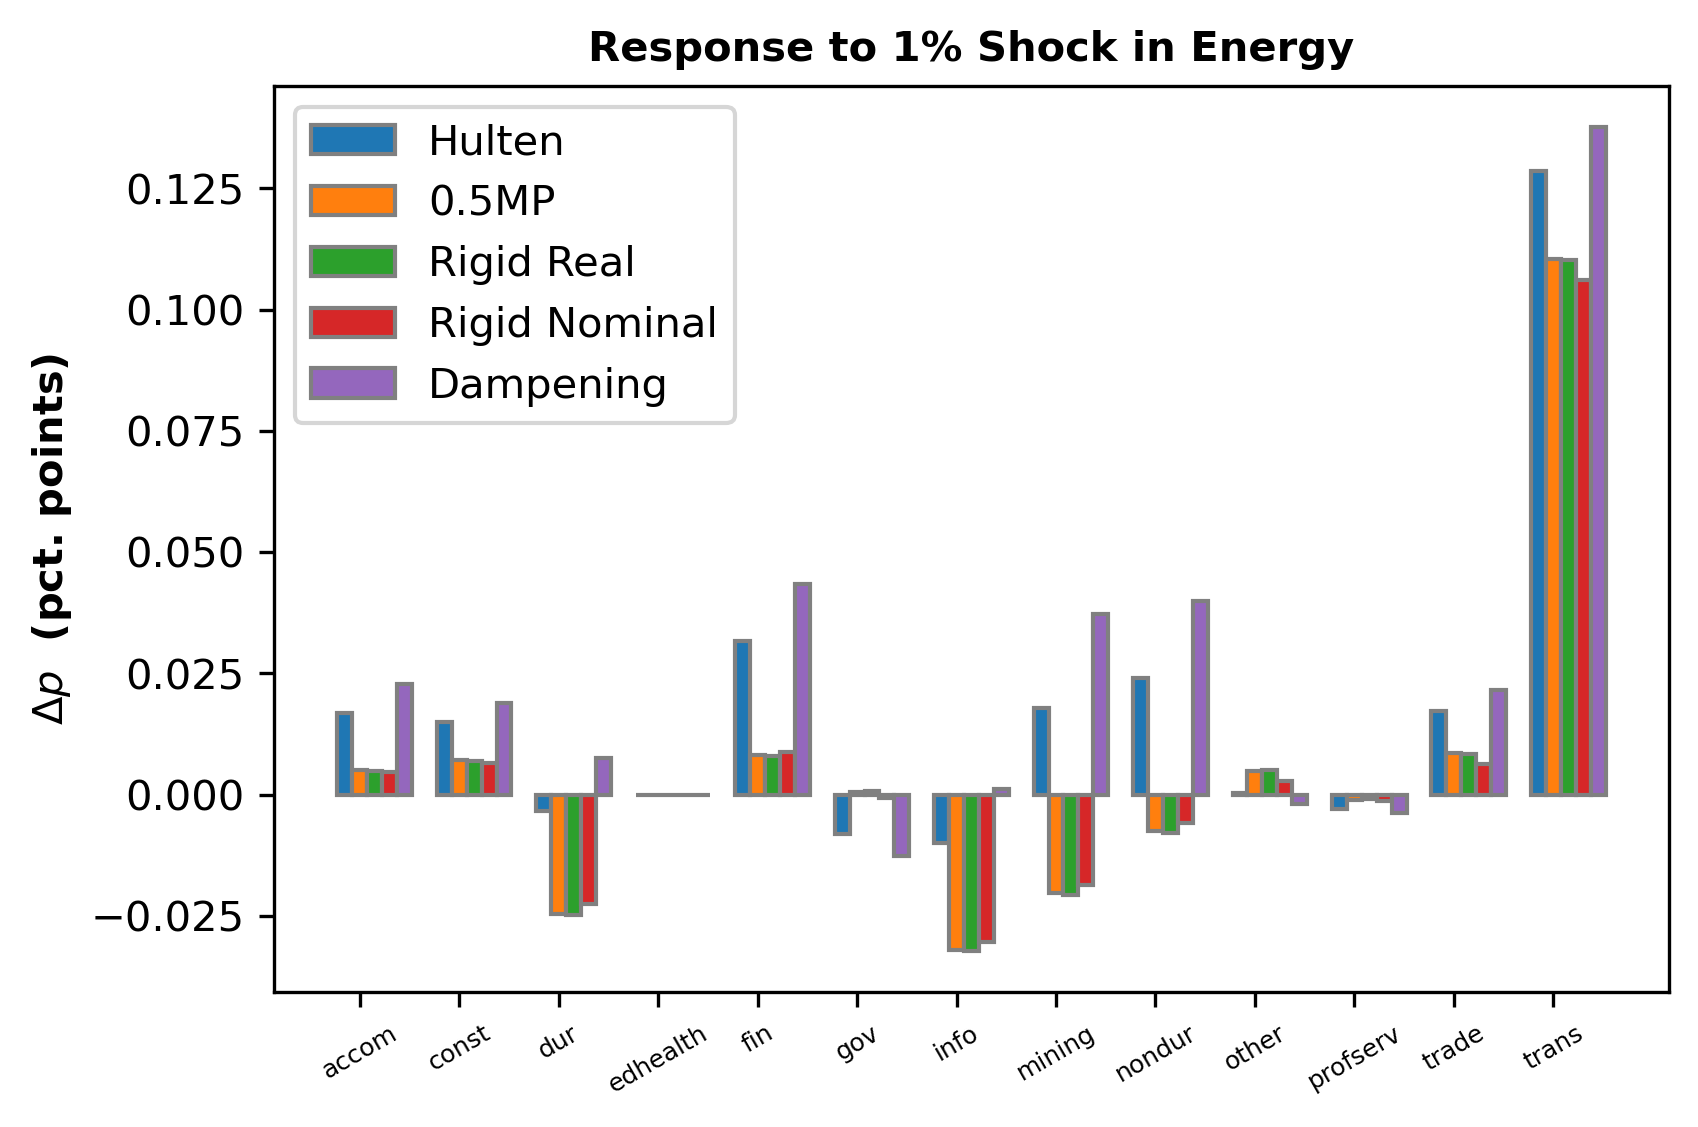

In [25]:
xlab = ''
ylab = '$\Delta p$  (pct. points)'
save_path = f'../output/figures/energy_A{A_spec}_KshockP_calib3.png'
labels = PriceAssumption
bar_plot(100*p_vec, sectors, title, xlab, ylab, labels, save_path, rotation=30, fontsize=10, barWidth = 0.15, dpi=300)

## Calibration figures: Response to Labor Supply Shock

### Aggregate importance of deviations from Hulten.

To analyse the quantitative importance of deviations from Hulten's theorem, below we vary $\gamma_A$ from 0 to 2, and plot the aggregate response to a 1\% shock to durable goods.

In [26]:
occupation_names

['Admin',
 'Agg',
 'Arts',
 'Bus Ops',
 'Care',
 'Clean',
 'Cons',
 'Educ',
 'Eng',
 'Food S',
 'Health P',
 'Health S',
 'Legal',
 'Manag',
 'Math',
 'Prod',
 'Prot S',
 'Repair',
 'Sales',
 'Science',
 'Soc S',
 'Trans']

In [27]:
dlog_A = np.zeros((J, 1))
dlog_H = np.zeros((O, 1))
dlog_K = np.zeros((K, 1))
dlog_H[9] = -0.01
dlog_H[-1] = -0.01
dlog_H[4] = -0.01
dlog_H[-5] = -0.01
dlog_lam = np.zeros_like(dlog_A)
dlog_epsN = np.zeros_like(epsN)
dlog_epsD = np.zeros_like(epsD)
num = 3
curlyE = multi_occupation_network.curlyEFunc(dlog_epsN,epsN)
PriceAssumption = ['Hulten', '0.5MP', 'Rigid Real', 'Rigid Nominal', 'Dampening']
sectorY_vec = np.zeros((J+1,len(PriceAssumption)))
occT_vec = np.zeros((O, len(PriceAssumption)))
occU_vec = np.zeros((O, len(PriceAssumption)))
p_vec = np.zeros((J, len(PriceAssumption)))

In [28]:
epsWs = {'Hulten': multi_occupation_network.WageElasticityFunc(gamma_A=1, gamma_H=1, gamma_K=1, Psi=Psi, curlyL=curlyL, epsN=epsN, epsK=epsK),
        '0.5MP': multi_occupation_network.WageElasticityFuncMP(0.5,  Psi, epsN, epsK, curlyF, curlyQ, curlyT, curlyL),
        'Rigid Real': multi_occupation_network.WageElasticityFuncMP(0,  Psi, epsN, epsK, curlyF, curlyQ, curlyT, curlyL),
        'Dampening': multi_occupation_network.WageElasticityFunc(gamma_A=1.5, gamma_H=1.5, gamma_K=1.5, Psi=Psi, curlyL=curlyL, epsN=epsN, epsK=epsK)}
dlog_Ws = {}
for i in epsWs.keys():
    epsW_A, epsW_H, epsW_K = epsWs[i]
    dlog_Ws[i] = multi_occupation_network.WageFunc(dlog_A, dlog_H, dlog_K, epsW_A, epsW_H, epsW_K)
    

In [29]:
for i, a in enumerate(PriceAssumption):
    if a == 'Rigid Nominal':
        dlog_p = nominal_rigidity_network.PriceFuncAlt(dlog_A=dlog_A, dlog_H=dlog_H, dlog_K=dlog_K, Psi=Psi, epsN=epsN, epsK=epsK, curlyQ=curlyQ, curlyT=curlyT, curlyF=curlyF, curlyL=curlyL, num=num)
        dlog_theta = nominal_rigidity_network.ThetaFuncAlt(dlog_H, dlog_A, dlog_K, dlog_p, Psi, epsN, epsK, curlyL, curlyQ, curlyT, curlyF, num=num)
        dlog_y = multi_occupation_network.OutputFunc(dlog_A,dlog_H, dlog_K, dlog_theta, dlog_lam, Psi, Omega, curlyQ, curlyF, epsN, epsK, curlyT, curlyE)
        dlog_r = nominal_rigidity_network.rFunc(dlog_y, dlog_K, num)
    else:
        dlog_theta = multi_occupation_network.ThetaFunc(dlog_A, dlog_H, dlog_K, dlog_Ws[a], dlog_epsN, dlog_lam, Psi, Omega, curlyF, curlyQ, curlyT, curlyE, curlyL, epsN, epsK)
        dlog_y = multi_occupation_network.OutputFunc(dlog_A,dlog_H, dlog_K, dlog_theta, dlog_lam, Psi, Omega, curlyQ, curlyF, epsN, epsK, curlyT, curlyE)
        dlog_r = multi_occupation_network.rFunc(dlog_y, dlog_K, num)
        dlog_p = multi_occupation_network.PriceFunc(dlog_A, dlog_r, dlog_Ws[a], dlog_theta, Psi, curlyQ, epsN, epsK, curlyT, curlyL, num=num)
    sectorY_vec[:-1, i] = dlog_y.flatten()
    sectorY_vec[-1, i] = multi_occupation_network.AggOutputFunc(dlog_y, dlog_lam, dlog_epsD, epsD)
    p_vec[:, i] = dlog_p.flatten()
    occT_vec[:, i] = dlog_theta.flatten()
    occU_vec[:, i] = multi_occupation_network.UnemploymentFunc(multi_occupation_network.LaborSupply(dlog_H, dlog_theta, curlyF), dlog_H).flatten()

In [30]:
sectorY_vec.shape

(14, 5)

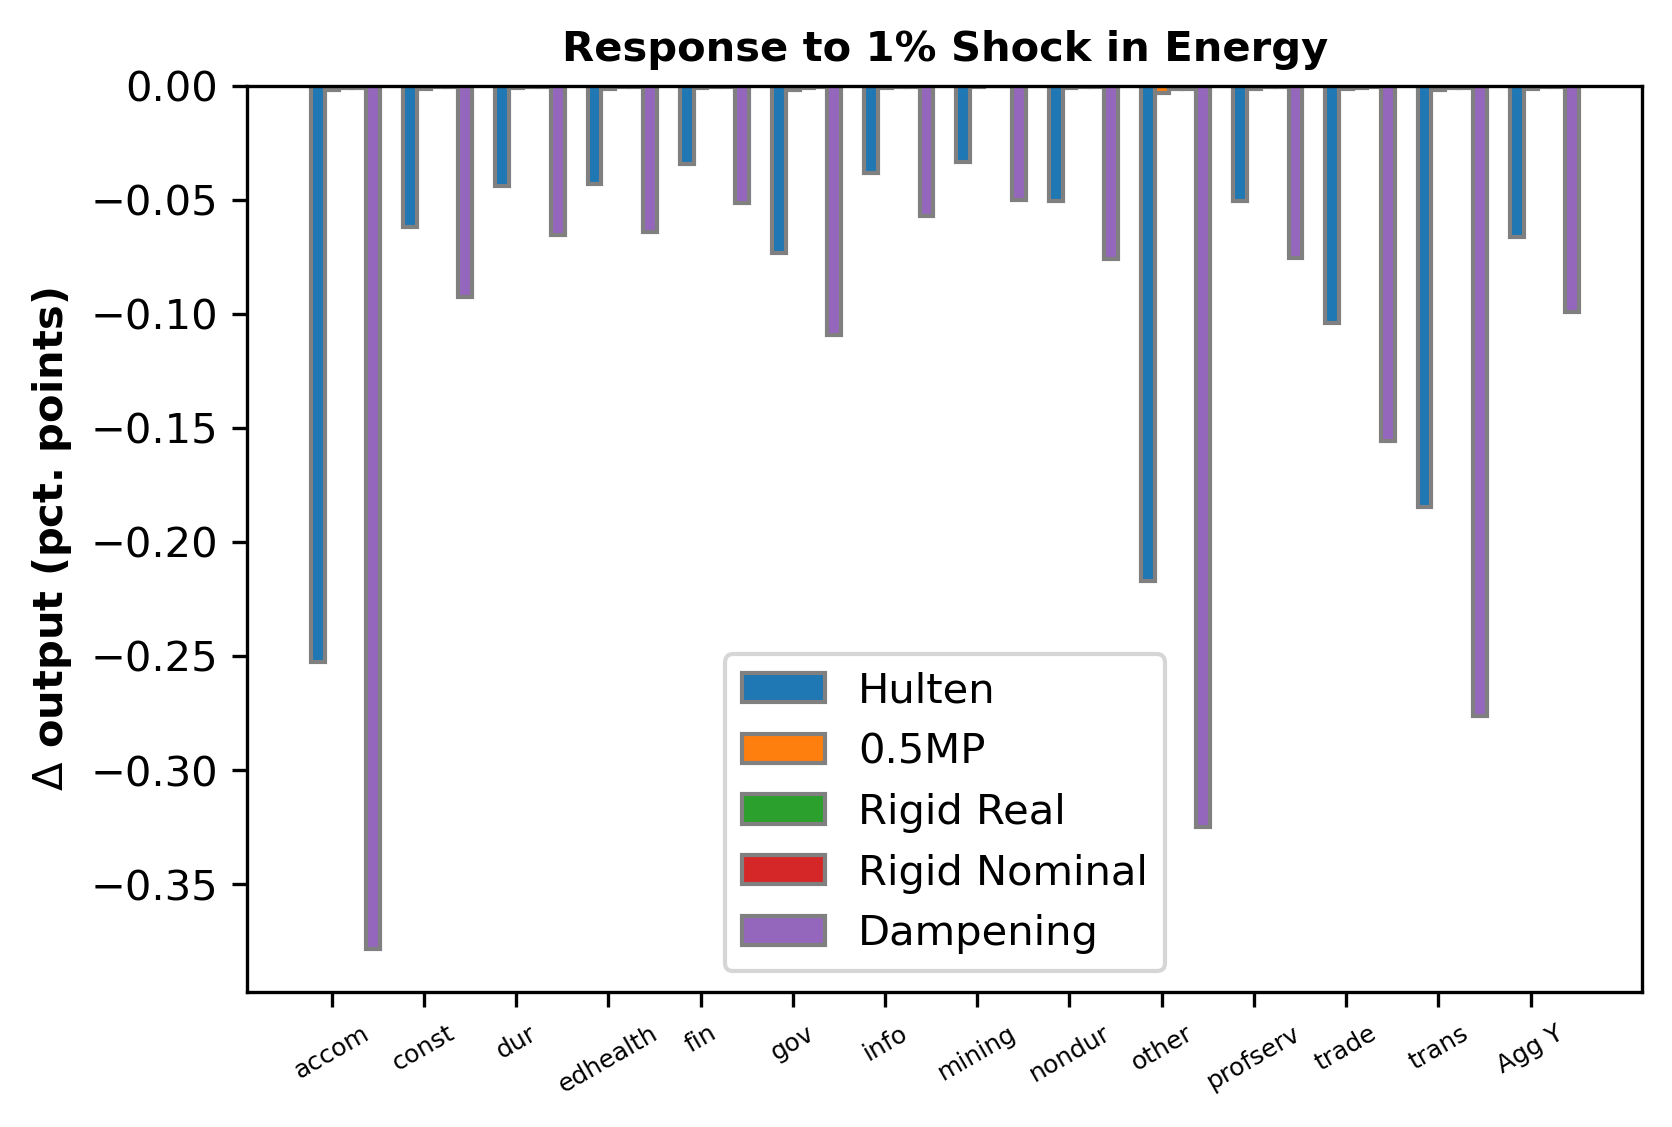

In [31]:
title = f'Response to 1% Shock in Energy'
xlab = ''
ylab = '$\Delta$ output (pct. points)'
save_path = f'../output/figures/energy_A{A_spec}_HshockY_calib3.png'
labels = PriceAssumption
bar_plot(100*sectorY_vec, sector_names, title, xlab, ylab, labels, save_path, rotation=30, fontsize=10, barWidth = 0.15, dpi=300)

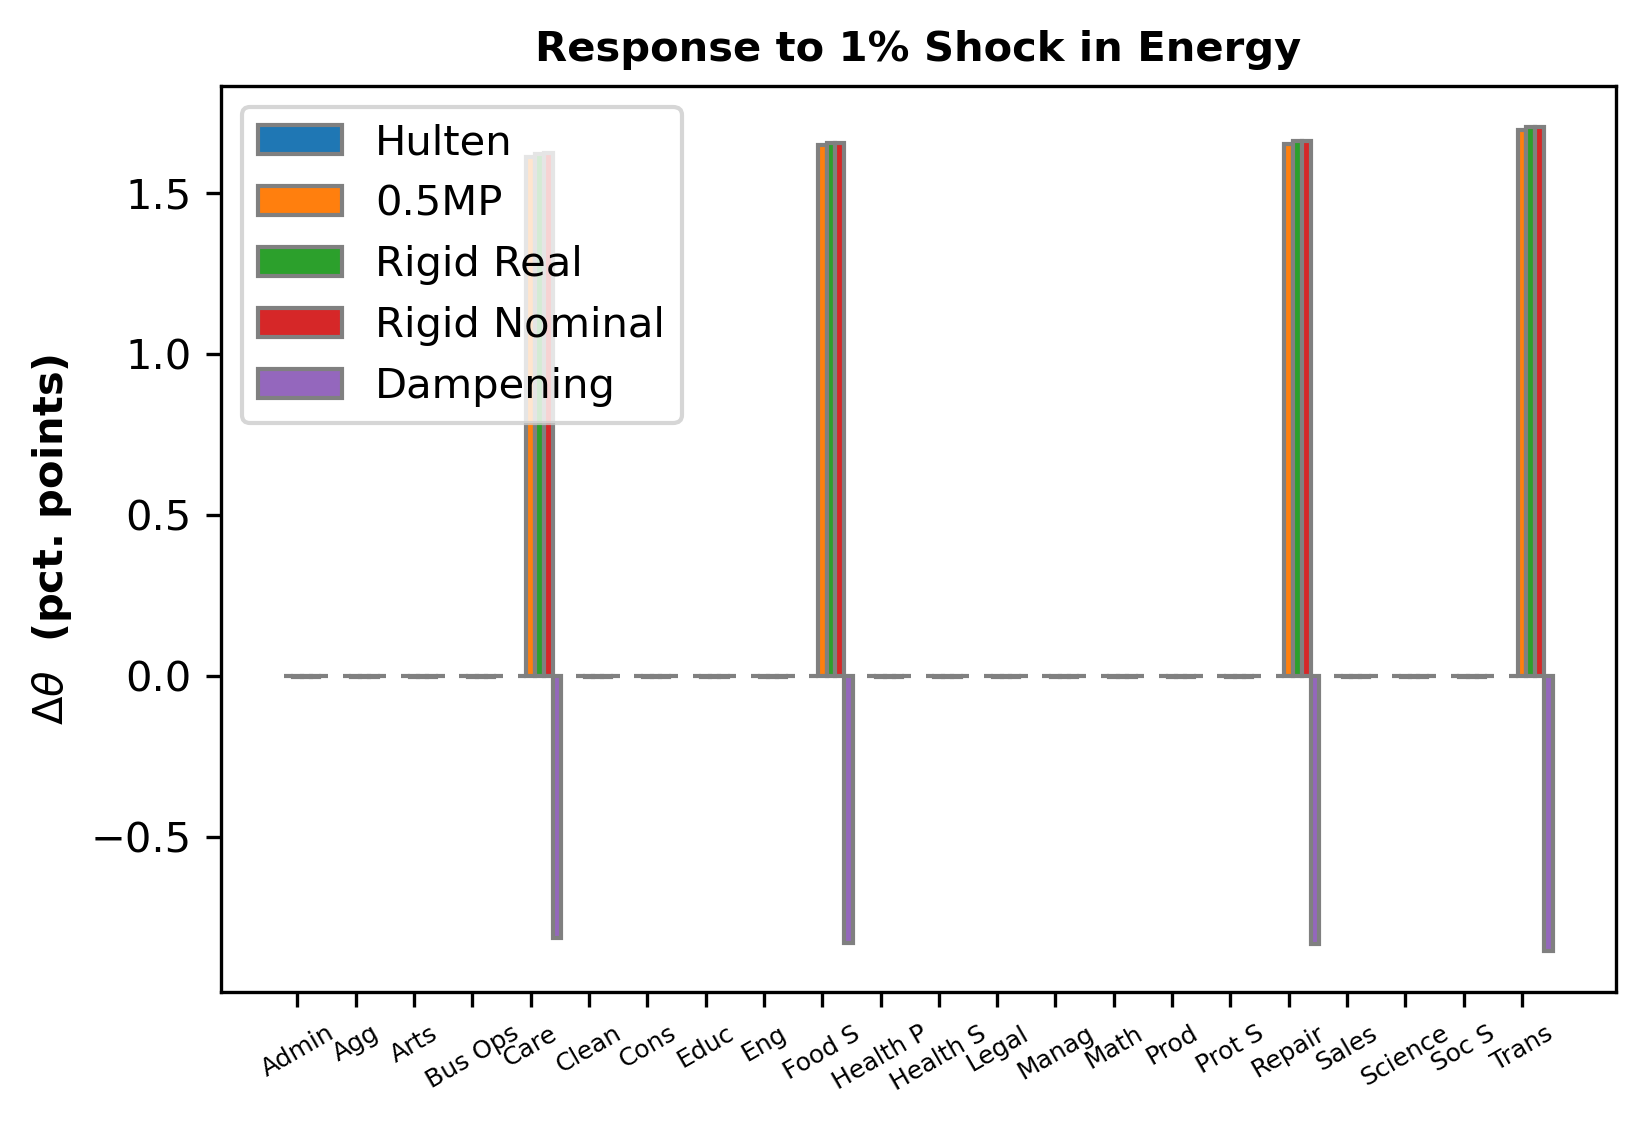

In [32]:
xlab = ''
ylab = '$\Delta \\theta$  (pct. points)'
save_path = f'../output/figures/energy_A{A_spec}_HshockT_calib3.png'
labels = PriceAssumption
bar_plot(100*occT_vec, occupation_names, title, xlab, ylab, labels, save_path, rotation=30, fontsize=10, barWidth = 0.15, dpi=300)

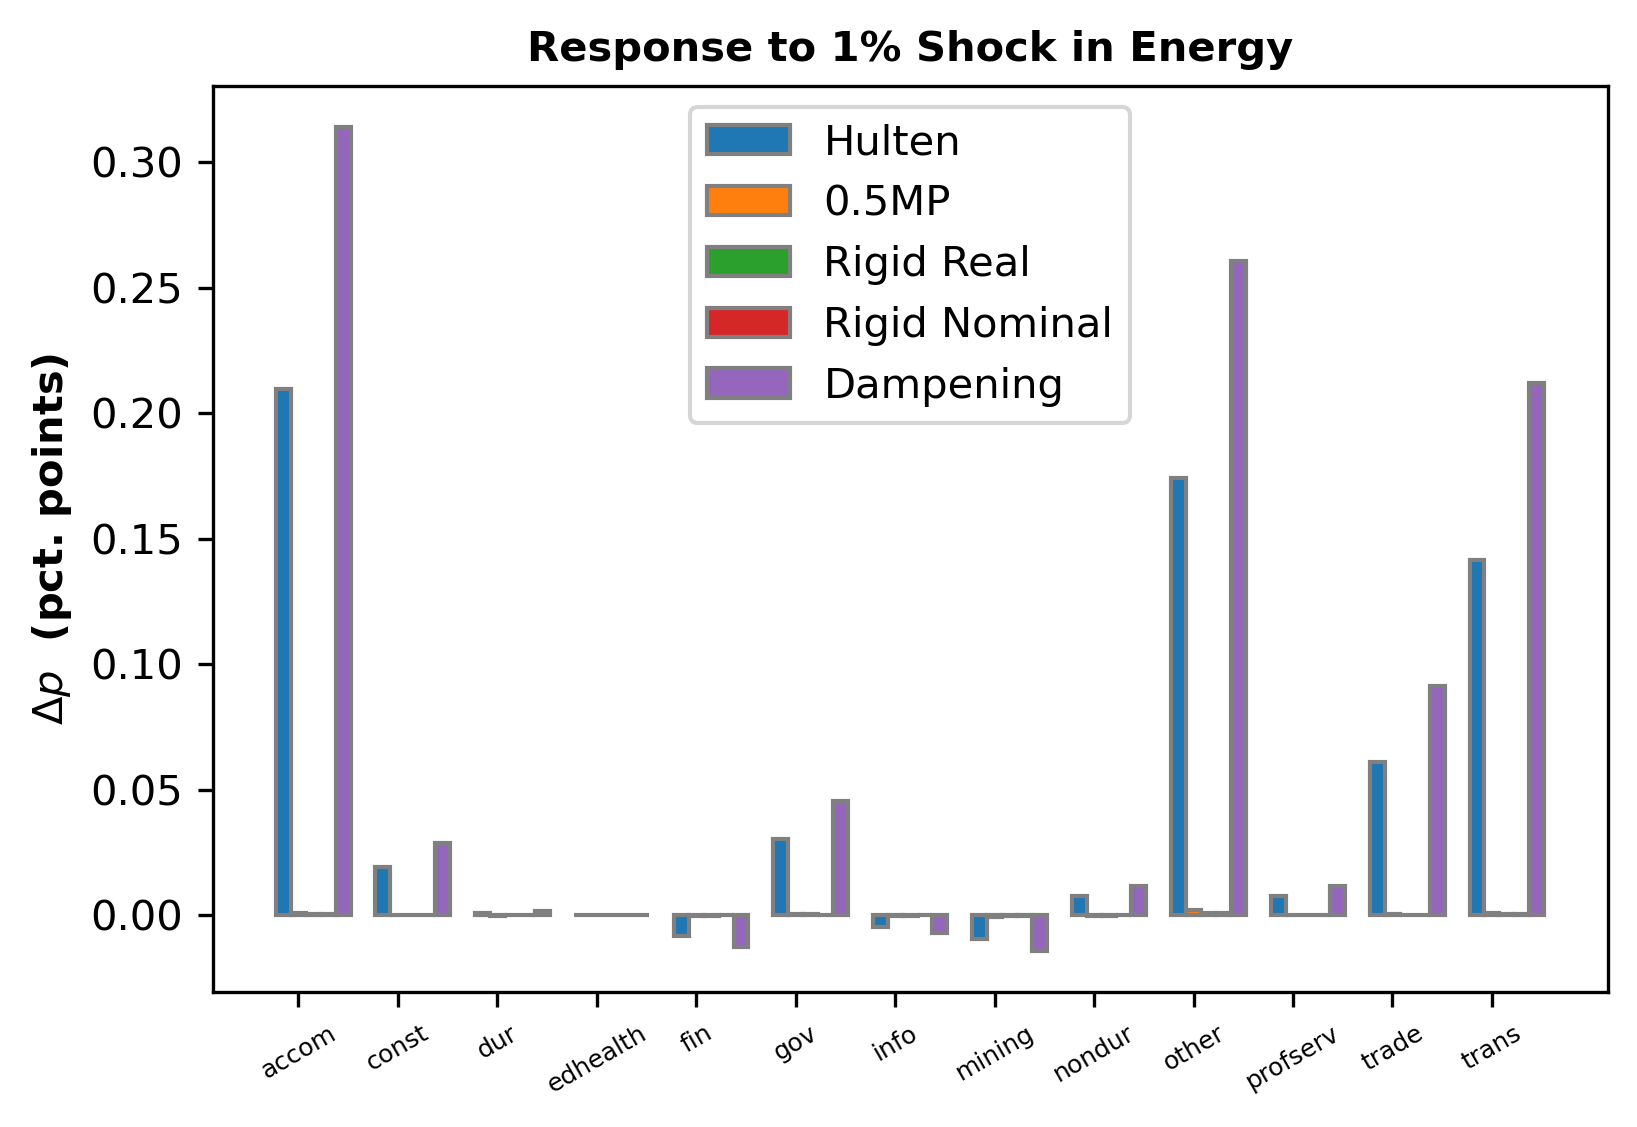

In [33]:
xlab = ''
ylab = '$\Delta p$  (pct. points)'
save_path = f'../output/figures/energy_A{A_spec}_HshockP_calib3.png'
labels = PriceAssumption
bar_plot(100*p_vec, sectors, title, xlab, ylab, labels, save_path, rotation=30, fontsize=10, barWidth = 0.15, dpi=300)